In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
%matplotlib widget

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((2020, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time

Pro75M1670 = SolidMotor(
    thrustSource="Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

Pro75M1670.info()

TypeError: __init__() missing 1 required positional argument: 'thrustSource'

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


 Rail Departure State

Rail Departure Time: 0.363 s
Rail Departure Velocity: 25.799 m/s
Rail Departure Static Margin: 2.133 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 10.143
Rail Departure Reynolds Number: 2.009e+05


BurnOut State

BurnOut time: 3.900 s
Altitude at burnOut: 657.273 m (AGL)
Rocket velocity at burnOut: 279.522 m/s
Freestream velocity at burnOut: 279.522 m/s
Mach Number at burnOut: 0.842
Kinetic energy at burnOut: 6.345e+05 J


Apogee

A

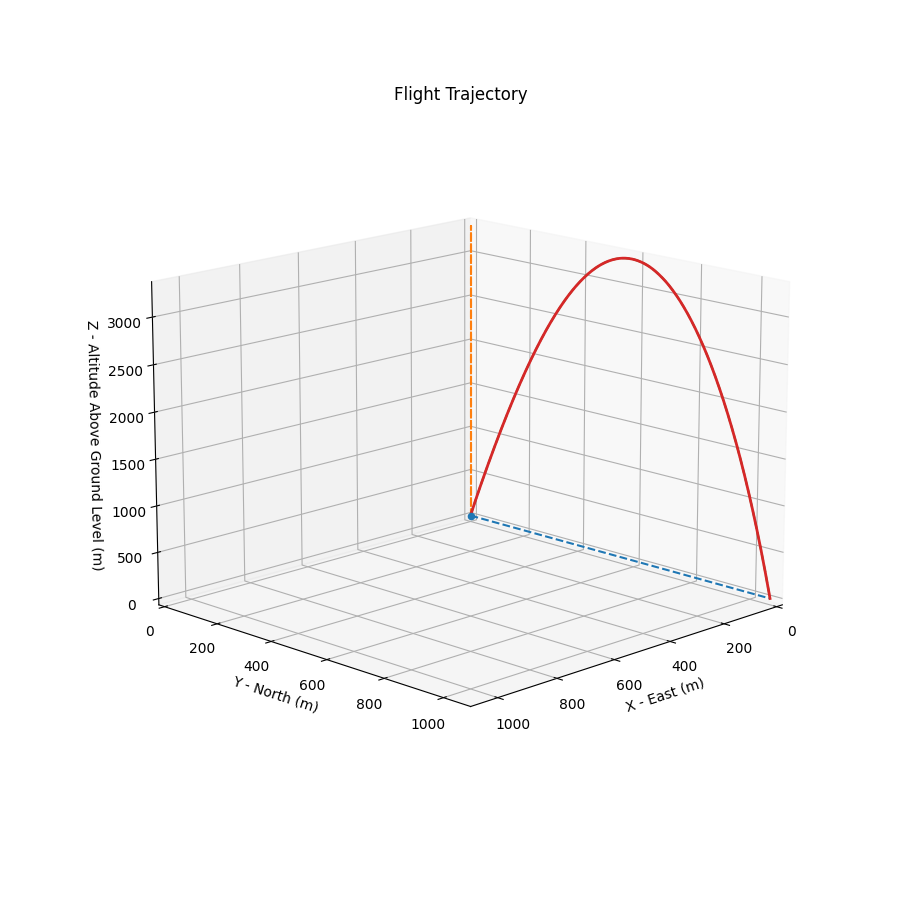



Trajectory Kinematic Plots



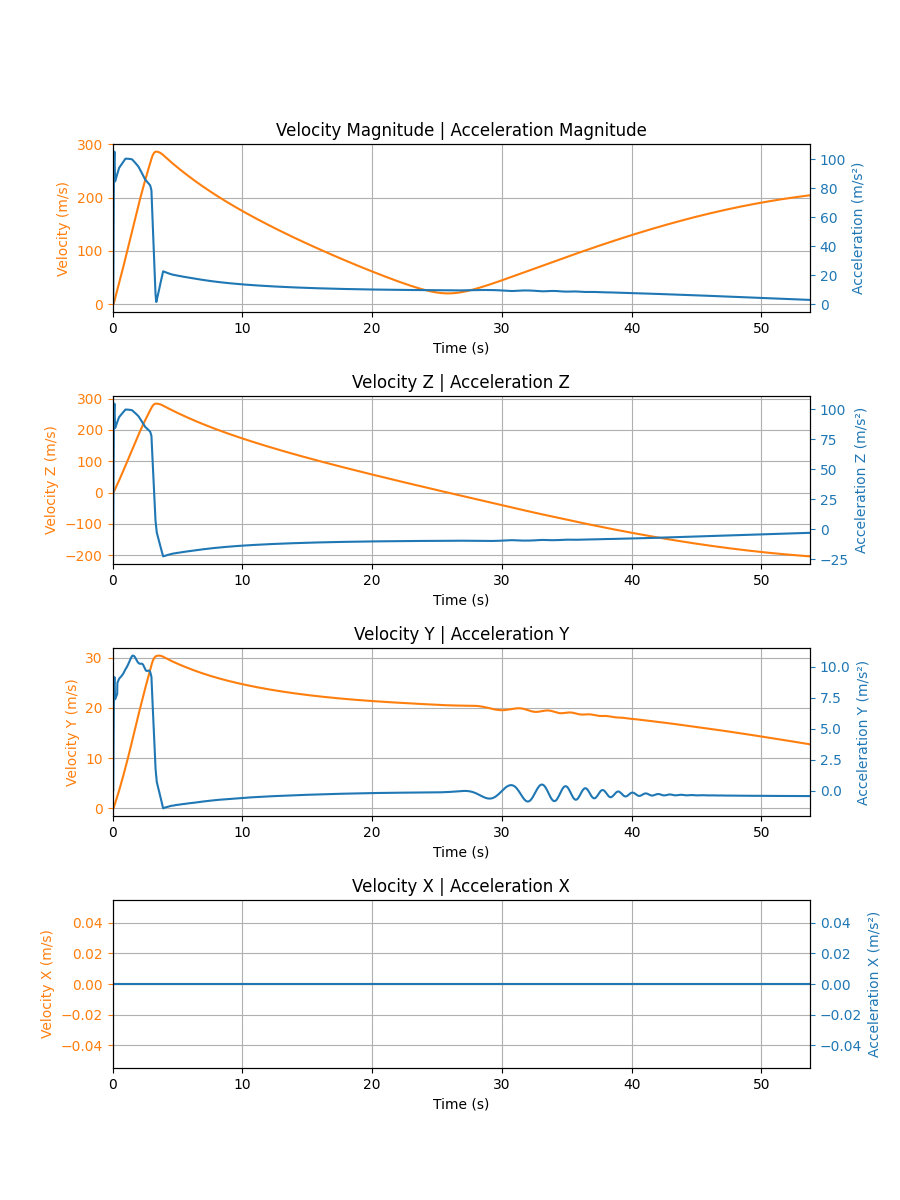



Angular Position Plots



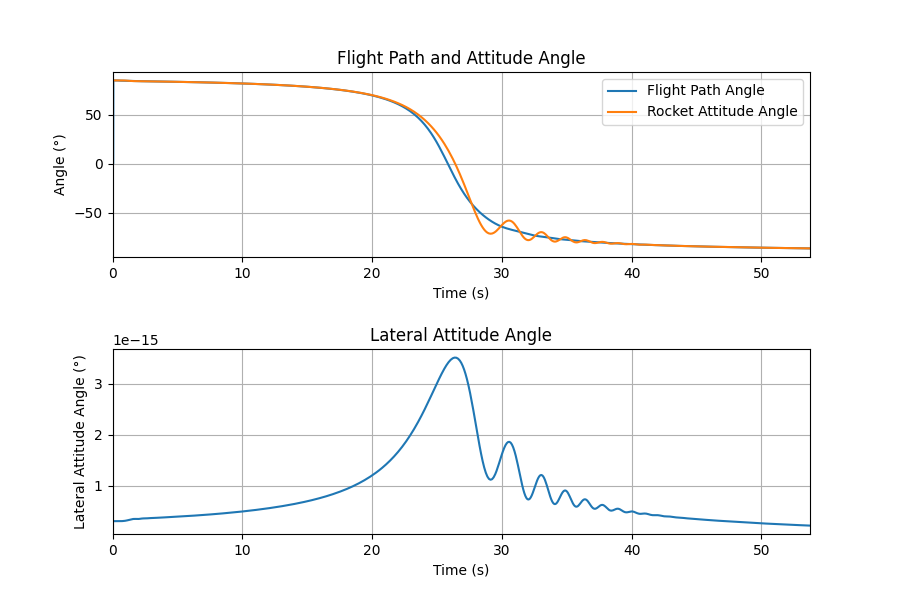



Path, Attitude and Lateral Attitude Angle plots



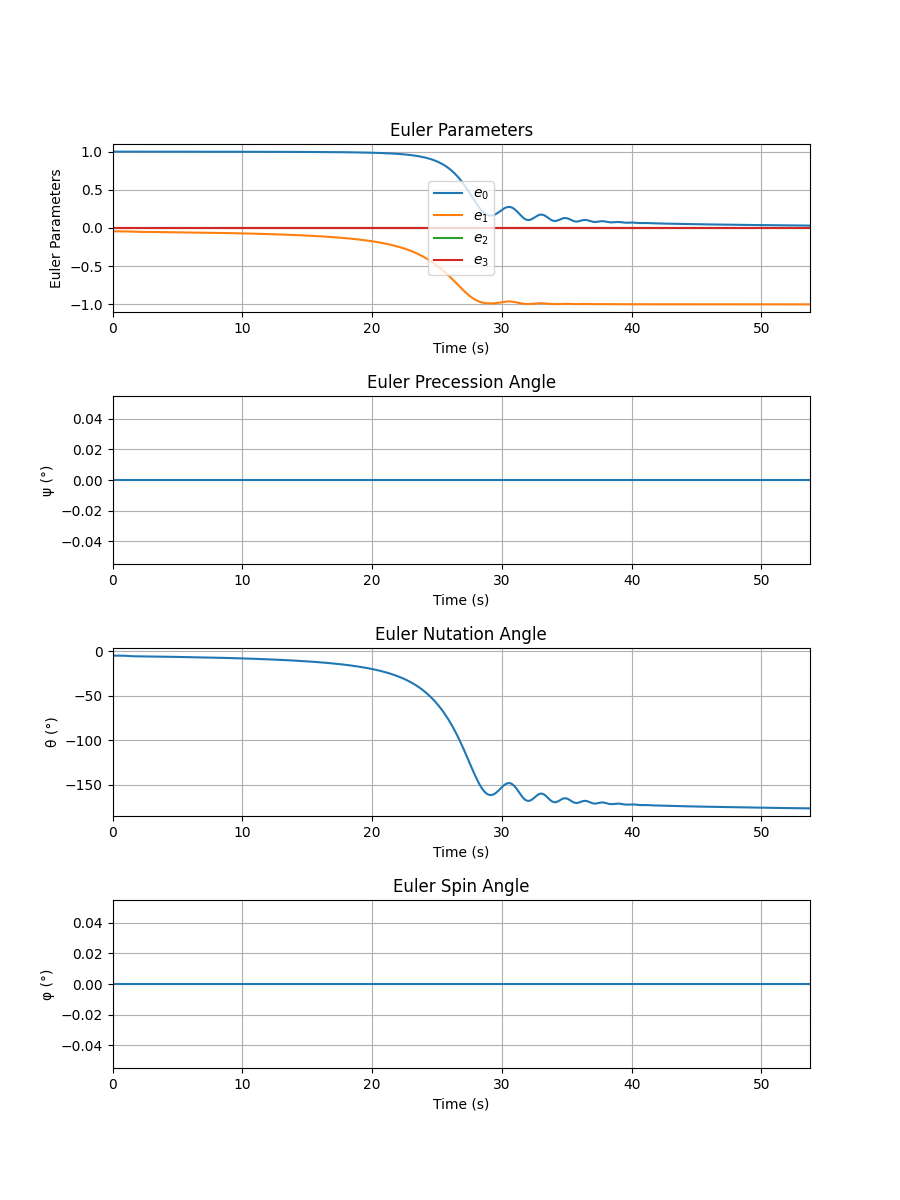



Trajectory Angular Velocity and Acceleration Plots



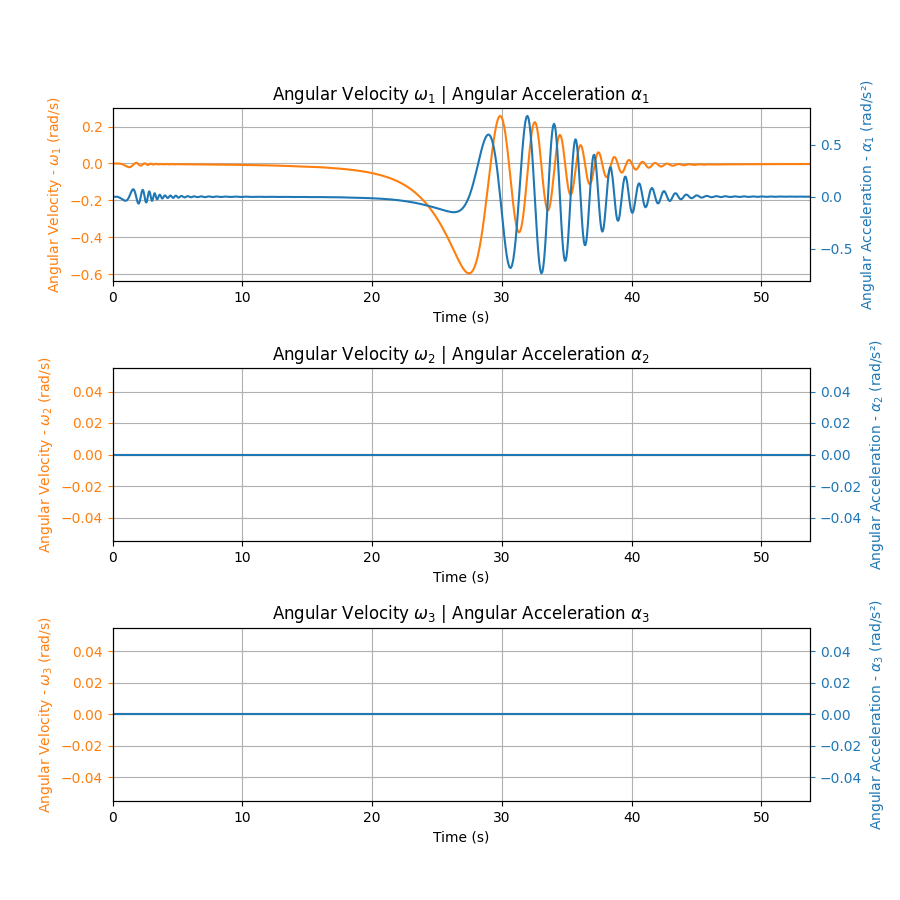



Trajectory Force Plots



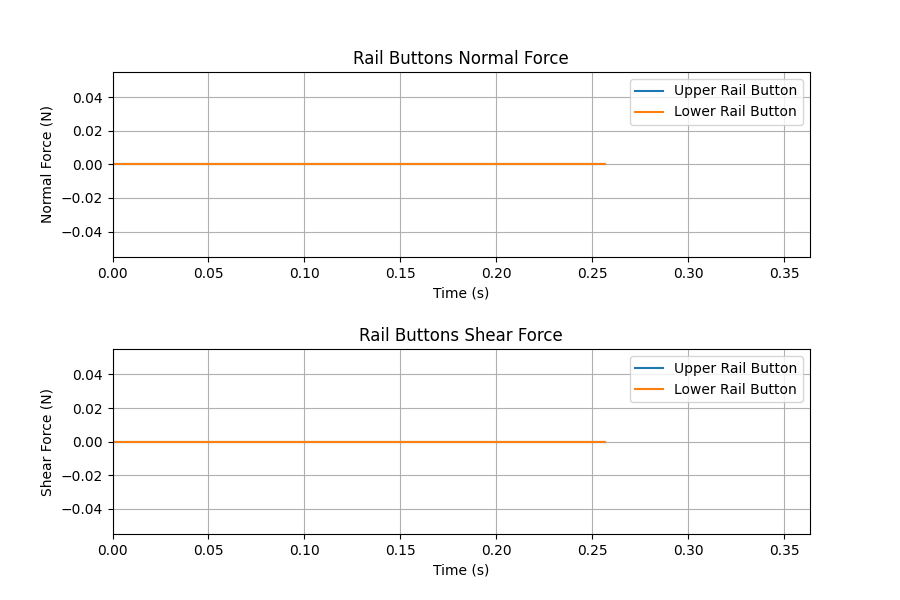

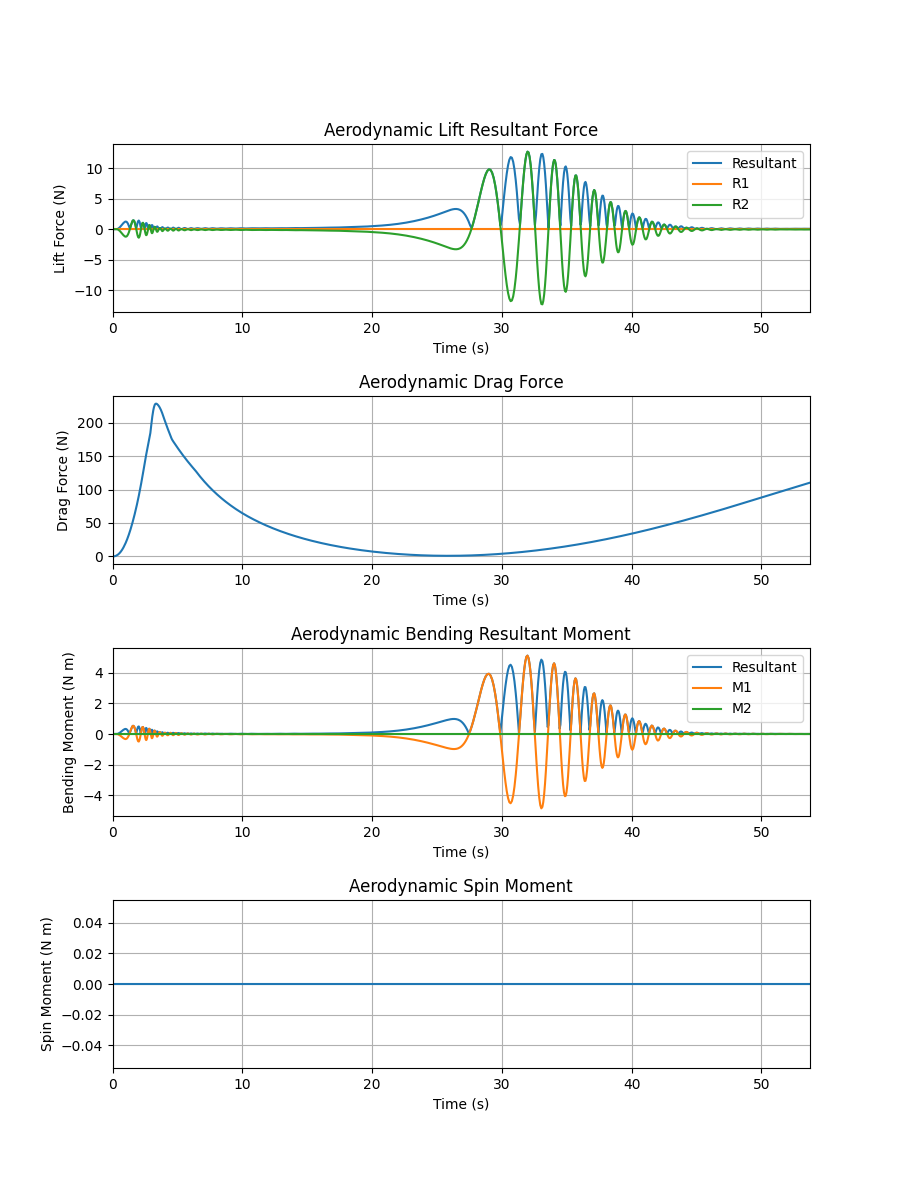



Trajectory Energy Plots



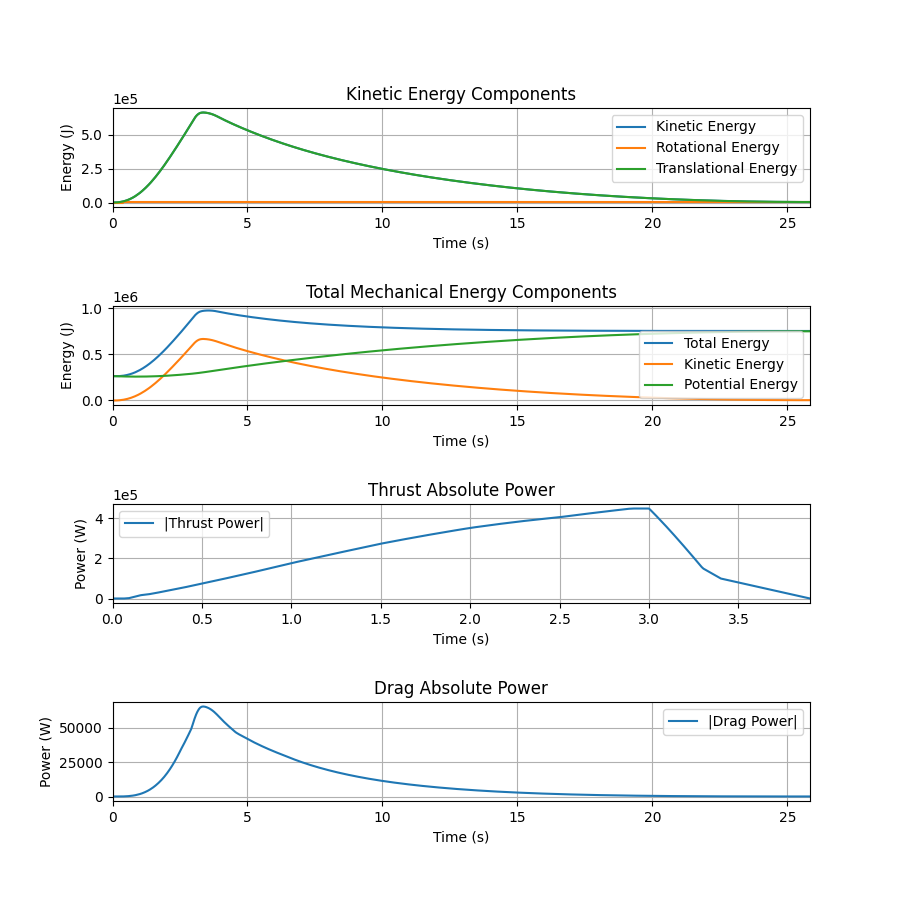



Trajectory Fluid Mechanics Plots



/Users/jordanianjoker/opt/anaconda3/lib/python3.8/site-packages/rocketpy/Flight.py:2979: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax4.set_ylim(0, self.angleOfAttack(self.outOfRailTime))


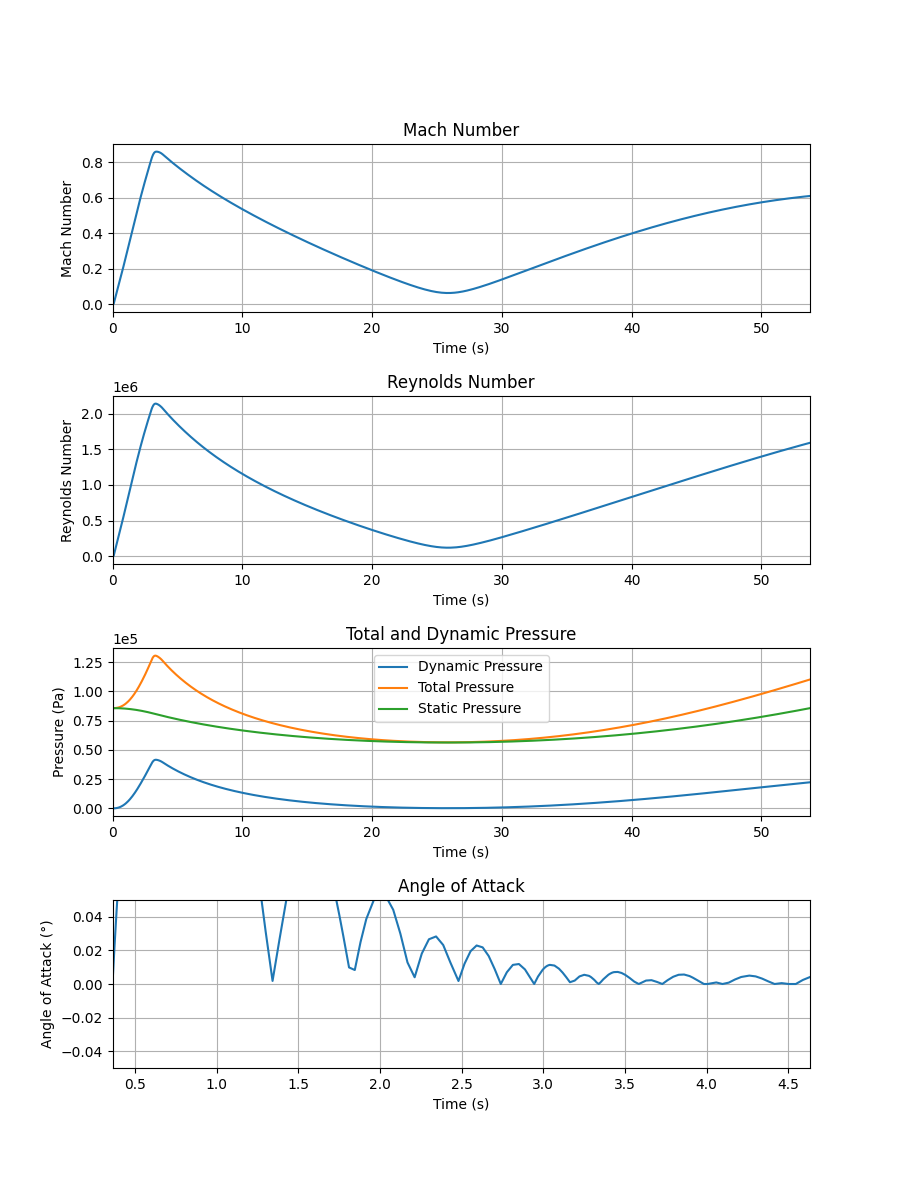



Trajectory Stability and Control Plots



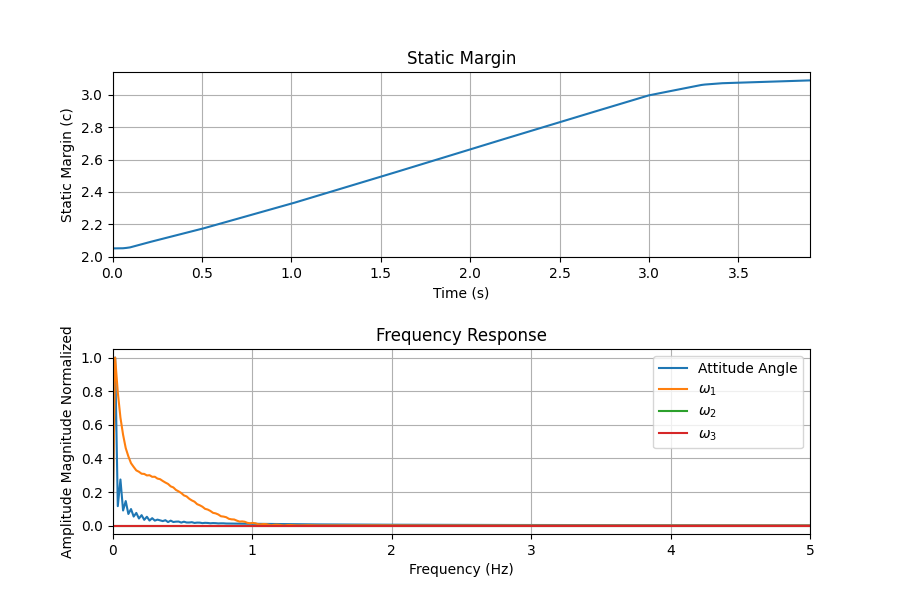

In [9]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="RocketPy-master/data/calisto/powerOffDragCurve.csv",
    powerOnDrag="RocketPy-master/data/calisto/powerOnDragCurve.csv",
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)

TestFlight.allInfo()